In [18]:
%matplotlib inline
import pandas as pd, numpy as np, os
pd.set_option('max.columns', 500)

In [19]:
from backtest.backtest import Backtest, Optimizer
from backtest.data_prep import prepare_data
from backtest.predict_FPPG import predict_FPPG

### Load data

In [20]:
HISTORY = './data/nba_fantasy_pts.csv'
DF = './data/nba_1_11_19.csv'

In [21]:
history_df, daily_df = prepare_data(HISTORY, DF)

In [23]:
daily_df.head()

,Nickname,Position,Salary,FPPG
0,James Harden,SG,12600,56.064862
2,Joel Embiid,C,11100,52.140002
4,Karl-Anthony Towns,C,10400,46.624390
5,Stephen Curry,PG,10200,45.216667
6,Kevin Durant,SF,10100,48.556099


In [22]:
history_df.head()

,GID,"Last, First",First Last,Date,Team,Opp,H/A,GameID,GTime(ET),Team pts,Opp pts,Start,Minutes,GP,active,FDP,DKP,DDP,YHP,Stats,DoubleD,TripleD,FD Sal,FD Change,DK Sal,DK Change,DD Sal,DD Change,YH Sal,YH Change,FD pos,DK pos,DD pos,YH pos,ADI,VMI,Unnamed: 36
1,5679,"Eubanks, Drew",Drew Eubanks,2019-01-10,sas,okc,H,20190110-okc-sas,21.5,154.0,147.0,0.0,0.000000,0.0,1.0,0.0,0.00,0.0,0.0,NaN,0.0,0.0,3500.0,0.0,3000.0,0.0,NaN,NaN,10.0,0.0,PF,45.0,NaN,4.0,64.88,0.16,NaN
2,5679,"Eubanks, Drew",Drew Eubanks,2019-01-09,sas,mem,A,20190109-sas-mem,20.0,86.0,96.0,0.0,4.416667,1.0,1.0,1.2,1.25,1.0,1.2,0pt 1rb 0-1fg,0.0,0.0,3500.0,0.0,3000.0,0.0,NaN,NaN,10.0,0.0,PF,45.0,NaN,4.0,66.80,-3.17,NaN
3,5679,"Eubanks, Drew",Drew Eubanks,2019-01-07,sas,det,A,20190107-sas-det,19.0,119.0,107.0,0.0,0.000000,0.0,1.0,0.0,0.00,0.0,0.0,NaN,0.0,0.0,3500.0,0.0,3000.0,0.0,NaN,NaN,10.0,0.0,PF,45.0,NaN,4.0,62.51,1.86,NaN
4,5679,"Eubanks, Drew",Drew Eubanks,2019-01-05,sas,mem,H,20190105-mem-sas,20.5,108.0,88.0,0.0,2.216667,1.0,1.0,2.0,2.00,2.0,2.0,2pt 2-2ft,0.0,0.0,3500.0,0.0,3000.0,0.0,NaN,NaN,10.0,0.0,PF,45.0,NaN,4.0,64.61,-0.24,NaN
6,5679,"Eubanks, Drew",Drew Eubanks,2018-12-31,sas,bos,H,20181231-bos-sas,19.0,120.0,111.0,0.0,0.000000,0.0,1.0,0.0,0.00,0.0,0.0,NaN,0.0,0.0,3500.0,0.0,3000.0,0.0,NaN,NaN,10.0,0.0,PF,45.0,NaN,4.0,63.83,-0.78,NaN


### Make predictions based on predetermined formula

In [24]:
# Calculate predicted FPPG up until a certain point of time.

my_predictions = predict_FPPG(history_df, '2018-11-05')

2018-10-16
2018-10-17
2018-10-18
2018-10-19
2018-10-20
2018-10-21
2018-10-22
2018-10-23
2018-10-24
2018-10-25
2018-10-26
2018-10-27
2018-10-28
2018-10-29
2018-10-30
2018-10-31
2018-11-01
2018-11-02
2018-11-03
2018-11-04
2018-11-05


In [26]:
my_predictions.head()

,FPPG_predicted,Nickname,Position,Salary,Date,FPPG_actual,FPPG_error
0,34.5,Josh Richardson,SF,6300.0,2018-10-18,44.3,9.8
1,21.2,Dwyane Wade,SG,4800.0,2018-10-18,27.6,6.4
2,22.2,Robert Covington,SF,6500.0,2018-10-18,36.0,13.8
3,64.0,Ben Simmons,PG,10000.0,2018-10-18,51.1,-12.9
4,10.0,Tyler Johnson,PG,3900.0,2018-10-18,13.7,3.7


In [27]:
my_predictions[my_predictions.Nickname == 'Ben Simmons']

,FPPG_predicted,Nickname,Position,Salary,Date,FPPG_actual,FPPG_error
3,64.000000,Ben Simmons,PG,10000.0,2018-10-18,51.1,-12.900000
257,57.550000,Ben Simmons,PG,11000.0,2018-10-20,10.0,-47.550000
850,41.700000,Ben Simmons,PG,11100.0,2018-10-24,46.1,4.400000
1355,42.800000,Ben Simmons,PG,10000.0,2018-10-27,31.9,-10.900000
1677,40.620000,Ben Simmons,PG,9700.0,2018-10-29,49.9,9.280000
1889,42.166667,Ben Simmons,PG,10500.0,2018-10-30,24.6,-17.566667
2247,39.657143,Ben Simmons,PG,10000.0,2018-11-01,35.1,-4.557143
2608,39.087500,Ben Simmons,PG,9800.0,2018-11-03,35.5,-3.587500


In [30]:
"Mean: {}; Std. Error: {}".format(my_predictions.FPPG_error.mean(), my_predictions.FPPG_error.std())

'Mean: -0.7193025604084522; Std. Error: 10.335403268638624'

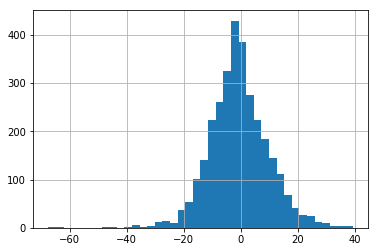

In [29]:
my_predictions.FPPG_error.hist(bins=40)

### Optimizer

In [36]:
# Get optimized lineup for today's picks.

todays_preds = Optimizer(daily_df)
todays_preds.optimize()

,Nickname
0,Joel Embiid
1,Dario Saric
2,Taj Gibson
3,Derrick Rose
4,Kemba Walker
5,Jabari Parker
6,Kevin Durant
7,Jeremy Lamb
8,Tim Hardaway Jr.


### Backtest

In [37]:
# Setup optimizer for backtest.

my_optimizer = Optimizer(my_predictions)

In [39]:
# Initiate backtest with optimizer as parameter.

my_backtest = Backtest(my_optimizer)

#### Backtest Dataframe

In [43]:
my_backtest.create_backtest_df()

In [44]:
my_backtest.backtest_df

,players_2018-10-18,FPPG_predicted_2018-10-18,FPPG_actual_2018-10-18,players_2018-10-19,FPPG_predicted_2018-10-19,FPPG_actual_2018-10-19,players_2018-10-20,FPPG_predicted_2018-10-20,FPPG_actual_2018-10-20,players_2018-10-21,FPPG_predicted_2018-10-21,FPPG_actual_2018-10-21,players_2018-10-22,FPPG_predicted_2018-10-22,FPPG_actual_2018-10-22,players_2018-10-23,FPPG_predicted_2018-10-23,FPPG_actual_2018-10-23,players_2018-10-24,FPPG_predicted_2018-10-24,FPPG_actual_2018-10-24,players_2018-10-25,FPPG_predicted_2018-10-25,FPPG_actual_2018-10-25,players_2018-10-26,FPPG_predicted_2018-10-26,FPPG_actual_2018-10-26,players_2018-10-27,FPPG_predicted_2018-10-27,FPPG_actual_2018-10-27,players_2018-10-28,FPPG_predicted_2018-10-28,FPPG_actual_2018-10-28,players_2018-10-29,FPPG_predicted_2018-10-29,FPPG_actual_2018-10-29,players_2018-10-30,FPPG_predicted_2018-10-30,FPPG_actual_2018-10-30,players_2018-10-31,FPPG_predicted_2018-10-31,FPPG_actual_2018-10-31,players_2018-11-01,FPPG_predicted_2018-11-01,FPPG_actual_2018-11-01,players_2018-11-02,FPPG_predicted_2018-11-02,FPPG_actual_2018-11-02,players_2018-11-03,FPPG_predicted_2018-11-03,FPPG_actual_2018-11-03,players_2018-11-04,FPPG_predicted_2018-11-04,FPPG_actual_2018-11-04,players_2018-11-05,FPPG_predicted_2018-11-05,FPPG_actual_2018-11-05
0,Joel Embiid,42.0,61.9,Willie Cauley Stein,NaN,NaN,Deandre Ayton,45.00,14.1,Nikola Jokic,61.50,43.2,JaVale McGee,37.650000,32.1,Nikola Jokic,55.400000,37.4,Joel Embiid,54.275000,68.8,JaVale McGee,38.150000,38.4,Ed Davis,21.125000,21.7,Joel Embiid,57.180,49.8,Rudy Gobert,42.900000,57.2,Dewayne Dedmon,29.300000,20.0,Nikola Vucevic,42.783333,43.5,Rudy Gobert,45.283333,53.1,Tristan Thompson,23.285714,24.4,Rudy Gobert,46.400000,30.7,JaVale McGee,37.375000,43.3,JaVale McGee,38.033333,22.2,Nerlens Noel,20.987500,14.5
1,Amir Johnson,10.1,17.1,Anthony Davis,80.2,54.0,Bobby Portis,42.20,31.3,Alex Poythress,18.40,14.0,Bobby Portis,36.750000,25.6,Blake Griffin,50.750000,77.8,LaMarcus Aldridge,51.133333,35.6,Blake Griffin,59.766667,42.5,Anthony Davis,68.266667,65.3,Blake Griffin,55.450,15.7,Markieff Morris,29.780000,1.2,Anthony Davis,67.525000,0.0,Blake Griffin,47.500000,44.5,Blake Griffin,47.000000,44.8,Anthony Davis,62.600000,0.0,Domantas Sabonis,30.985714,19.1,Blake Griffin,46.685714,61.6,LaMarcus Aldridge,40.650000,21.7,Anthony Davis,60.350000,29.1
2,Dario Saric,11.7,29.5,Kevon Looney,33.0,10.9,LaMarcus Aldridge,56.80,35.1,Marvin Bagley,28.05,20.4,Dwight Powell,28.600000,28.8,Nikola Mirotic,47.650000,34.4,Marvin Bagley,30.700000,20.7,Nikola Jokic,50.900000,41.7,Marvin Bagley,28.700000,21.6,Domantas Sabonis,31.375,20.5,Montrezl Harrell,30.940000,25.7,Zach Collins,25.440000,27.1,Zach Collins,25.716667,22.3,Domantas Sabonis,28.600000,45.3,Zach Collins,25.228571,14.7,Serge Ibaka,31.550000,31.3,Marcus Morris,25.300000,35.7,Serge Ibaka,31.522222,54.0,Serge Ibaka,33.770000,22.5
3,Ben Simmons,64.0,51.1,De'Aaron Fox,42.3,31.4,Ben Simmons,57.55,10.0,Stephen Curry,52.45,41.8,John Wall,50.950000,36.3,De'Aaron Fox,39.166667,18.2,Rajon Rondo,37.350000,0.0,Damian Lillard,45.900000,60.4,Derrick Rose,27.720000,26.6,Damian Lillard,49.525,58.4,Milos Teodosic,21.900000,10.5,Damian Lillard,51.300000,20.2,Kemba Walker,47.114286,34.8,Derrick Rose,27.585714,66.8,De'Aaron Fox,35.087500,65.5,Derrick Rose,32.487500,6.0,Bryn Forbes,21.271429,19.7,Fred VanVleet,23.500000,2.0,Chris Paul,44.033333,32.5
4,Goran Dragic,36.8,30.2,Stephen Curry,55.1,49.8,Rajon Rondo,34.30,40.4,Trae Young,31.80,55.9,Rajon Rondo,37.350000,0.0,Elfrid Payton,33.600000,43.2,Trae Young,39.833333,27.3,Rajon Rondo,37.350000,0.0,Stephen Curry,51.360000,36.8,Rajon Rondo,37.350,22.3,Stephen Curry,48.933333,48.9,Rajon Rondo,32.333333,28.2,Kyle Lowry,43.871429,39.6,Rajon Rondo,31.300000,13.5,Kemba Walker,45.575000,37.0,Stephen Curry,49.722222,51.3,Chris Paul,46.000000,34.2,Rajon Rondo,30.283333,14.7,Kyle Lowry,44.460000,43.9
5,Josh Richardson,34.5,44.3,Cedi Osman,38.0,37.6,Otto Porter,40.20,18.2,Cedi Osman,37.80,22.6,Joe Ingles,42

In [45]:
my_backtest.backtest_results()

In [46]:
my_backtest.results

,actual_sum,error,predicted_sum
2018-10-18,297.7,45.400000,252.300000
2018-10-19,276.4,-76.900000,353.300000
2018-10-20,208.3,-161.900000,370.200000
2018-10-21,296.3,-26.400000,322.700000
2018-10-22,252.8,-93.983333,346.783333
2018-10-23,307.9,-10.100000,318.000000
2018-10-24,250.5,-83.225000,333.725000
2018-10-25,260.3,-54.250000,314.550000
2018-10-26,248.2,-70.838333,319.038333
2018-10-27,239.2,-90.810000,330.010000


In [47]:
"Mean: {}; Std. Error: {}".format(my_backtest.results.actual_sum.mean(), my_backtest.results.actual_sum.std())

'Mean: 260.4473684210526; Std. Error: 34.8912814391767'

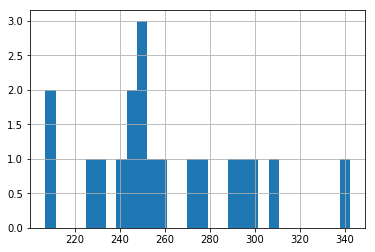

In [48]:
my_backtest.results.actual_sum.hist(bins=30)

### Conclusion

- Objective: Develop strategies to increase mean total FPPG, and reduce variance.
    - By manipulating predicted FPPG & optimizer.
- More accuracy in FPPG ==> less constraints needed for optimizer, and vice-versa.
    - ie. if perfect FPPG prediction, use determinstic optimizer. Otherwise, use optimizer to hedge against variance.

## Appendix

In [490]:
t = Optimizer()

TypeError: __init__() missing 1 required positional argument: 'df'

In [488]:
t.optimize().values

array([['JaVale McGee'],
       ['Blake Griffin'],
       ['Nikola Jokic'],
       ['Damian Lillard'],
       ['Rajon Rondo'],
       ['Evan Turner'],
       ['Lance Stephenson'],
       ['Gary Harris'],
       ['Nik Stauskas']], dtype=object)

In [377]:
class Strategy:
    '''
    This class will be used to develop a strategy for predicting FPPG.
    
    Input:
        DataFrames for analyzing; functions for predicting FPPG based on DataFrames
        
    Output:
        DataFrames with performance.
        Function to use for Backtest.
    '''
    
    def __init__(self, historical_df, function=None):
        self.history_df = historical_df.copy()
        self.function = function

        self.performance_df = None
        
    def calculate_performance(self):
        #self.function(historical_df)
        pass

In [320]:
class A:
    def __init__(self, a, b):
        self.a = a
        self.b = b

class B(A):
    def __init__(self, A, c, d):
        self.zz = A
        self.c = c
        self.d = d
        #super(A, self).__init__()

In [321]:
t = A(1, 2)
z = B(t, 3, 4)

In [293]:
class Backtest_old:
    '''
    This class is used to test the strategy and optimizer.  And report the historical FPPG.
    '''
    def __init__(self, daily_data_path, historical_data_path, start_date, end_date):
        self.daily_df = pd.read_csv(daily_data_path)
        self.history_df = pd.read_csv(historical_data_path, sep=':')
        self.player_list = None
        
        self.start_date = start_date #'YYYY-MM-DD'
        self.end_date = end_date #'YYYY-MM-DD'
        self.optimizer = LpProblem('fantasy', LpMaximize)

        self.tmp_df = pd.DataFrame(columns=['Nickname', 'Salary', 'FPPG_predicted', 'DATE', 'Position', 'Team', 'Opponent'])        
        self.backtest_df = None
        self.compare_df = None

            
    
    def clean_history_data(self):
        '''
        Reformats the date values and removes inactive players. 
        '''
        self.history_df.Date = pd.to_datetime(self.history_df.Date.astype('str'), format="%Y-%m-%d", exact=False)

        self.history_df = self.history_df[
            (self.history_df.active == 1)
        ]

    
    def create_player_list(self):
        '''
        Pull in player list, position and salaries from daily data to use for backtest. Use only eligible players.
        '''
        self.player_list = self.daily_df.loc[
            self.daily_df['Injury Indicator'].isnull(), 
            ['Nickname', 'Position', 'Salary', 'FPPG']
        ]  
        
        self.player_list['DATE'] = pd.to_datetime(self.end_date)
        
        
    def create_backtest_df(self):
        cols = []
        start_dates = [int(x) for x in self.start_date.split('-')]
        end_dates = [int(x) for x in self.end_date.split('-')]
        
        start_date = datetime.date(*start_dates)
        end_date = datetime.date(*end_dates)

        delta = datetime.timedelta(days=1)
        
        while start_date <= end_date:
            player_col = 'players_'+start_date.strftime("%Y-%m-%d")
            FPPG_predict_col = 'FPPG_prediction_'+start_date.strftime("%Y-%m-%d")
            FPPG_actual_col = 'FPPG_actual_'+start_date.strftime("%Y-%m-%d")
            cols += [player_col, FPPG_predict_col, FPPG_actual_col]
            
            start_date += delta

        self.backtest_df = pd.DataFrame(columns=cols)
        
        
    def make_predictions(self):
        '''
        Based on player list, date and dataset (historical data filtered on date), create a FPPG prediction.
        '''       
        cols = []
        start_dates = [int(x) for x in self.start_date.split('-')]
        end_dates = [int(x) for x in self.end_date.split('-')]
        
        start_date = datetime.date(*start_dates)
        end_date = datetime.date(*end_dates)

        delta = datetime.timedelta(days=1)
        
        while start_date <= end_date:        
            print(start_date)
            backtest = start_date.strftime("%Y-%m-%d")
        
            data = []

            if pd.Timestamp(backtest) not in set(self.history_df['Date']):  ### Check this before running function.
                start_date += delta 
                print('No games for this date.')
                continue

            for name in self.player_list.Nickname:
                if name in self.history_df['First  Last'].values:

                    tmp_df = self.history_df[
                        (self.history_df['First  Last'] == name) & 
                        (self.history_df.Date < backtest)
                    ].sort_values(by="Date", ascending=False)

                    if tmp_df.shape[0] == 0:    #indicates player hasn't played in any game prior to backtest date.
                        continue

                    _FDP_est = tmp_df[tmp_df.Minutes > 0].FDP.mean()  ### PREDICTED FPPG; will be more complex in future.
                    _salary = tmp_df['FD Sal'].values[0]

                    data.append({
                        'Nickname': name,
                        'FPPG_predicted': _FDP_est,
                        'Salary': _salary,
                        'DATE': pd.to_datetime(backtest)
                    })

            self.tmp_df = self.tmp_df.append(pd.DataFrame(data), ignore_index=True, sort=False)
            start_date += delta        
        
        #self.tmp_df = self.tmp_df.merge(self.pla)
    
    
    def create_compare_df(self):
        self.compare_df = self.tmp_df.merge(
            self.history_df[['First  Last', 'Date', 'FDP']],
            left_on=['Nickname', 'DATE'], right_on=['First  Last', 'Date']
        )
        
        self.compare_df.rename(columns={'FDP': 'FPPG_actual'}, inplace=True)
        self.compare_df['error'] = self.compare_df['FPPG_actual'] - self.compare_df['FPPG_predicted']
    
    



In [283]:
test = Backtest(df, history, '2018-11-01', '2018-11-06')

In [284]:
test.clean_history_data()
test.create_player_list()
test.create_backtest_df()

In [286]:
test.make_predictions()

2018-11-01
2018-11-02
2018-11-03
2018-11-04
2018-11-05
2018-11-06


In [287]:
test.create_compare_df()

In [288]:
test.optimize()

AttributeError: 'DataFrame' object has no attribute 'Position'

In [91]:
def backtest_per_date(df, date):
    data = []
    
    for name in df['First  Last'].unique():
        tmp_df = df[
            (df['First  Last'] == name) & 
            (df.Date <= date) & 
            (df.Minutes > 0) 
        ].sort_values(by="Date", ascending=False)
        
        if date not in tmp_df.Date:
            continue
        
        _FDP_est = tmp_df.FDP.mean()
        _date = tmp_df['Date'].values[0]
        _team = tmp_df['Team'].values[0]
        _salary = tmp_df['FD Sal'].values[0]
        
        data.append({
            'name': name,
            'FDP_est': _FDP_est,
            'date': _date,
            'team': _team,
            'salary': _salary
        })
        
    tmp = pd.DataFrame(data)
        
    return tmp

In [92]:
test = backtest_per_date(df, '2018-11-05')

In [106]:
t = df[
    (df['First  Last'] == 'Drew Eubanks') & 
    (df.Date <= '2018-11-21') & 
    (df.Minutes > 0) 
].sort_values(by="Date", ascending=False)

'2018-11-21' in t.Date.values

/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  import sys


False

In [54]:
def backtest_score():
    pass

In [95]:
df.head(3)

,GID,"Last, First",First Last,Date,Team,Opp,H/A,GameID,GTime(ET),Team pts,Opp pts,Start,Minutes,GP,active,FDP,DKP,DDP,YHP,Stats,DoubleD,TripleD,FD Sal,FD Change,DK Sal,DK Change,DD Sal,DD Change,YH Sal,YH Change,FD pos,DK pos,DD pos,YH pos,ADI,VMI,Unnamed: 36
1,5679,"Eubanks, Drew",Drew Eubanks,2019-01-10,sas,okc,H,20190110-okc-sas,21.5,154.0,147.0,0.0,0.000000,0.0,1.0,0.0,0.00,0.0,0.0,NaN,0.0,0.0,3500.0,0.0,3000.0,0.0,NaN,NaN,10.0,0.0,4.0,45.0,NaN,4.0,64.88,0.16,NaN
2,5679,"Eubanks, Drew",Drew Eubanks,2019-01-09,sas,mem,A,20190109-sas-mem,20.0,86.0,96.0,0.0,4.416667,1.0,1.0,1.2,1.25,1.0,1.2,0pt 1rb 0-1fg,0.0,0.0,3500.0,0.0,3000.0,0.0,NaN,NaN,10.0,0.0,4.0,45.0,NaN,4.0,66.80,-3.17,NaN
3,5679,"Eubanks, Drew",Drew Eubanks,2019-01-07,sas,det,A,20190107-sas-det,19.0,119.0,107.0,0.0,0.000000,0.0,1.0,0.0,0.00,0.0,0.0,NaN,0.0,0.0,3500.0,0.0,3000.0,0.0,NaN,NaN,10.0,0.0,4.0,45.0,NaN,4.0,62.51,1.86,NaN


In [93]:
test.tail()

""


In [ ]:
df = self.player_list.dropna().copy()

    salaries = {}
    points = {} 
    rewards = []
    costs = []
    total_pos = []
    position_constraints = []

    for pos in df.Position.unique():
        df_pos = df[df.Position == pos]
        salary = list(df_pos[["Nickname", "Salary"]].set_index("Nickname").to_dict().values())[0]
        point = list(df_pos[["Nickname", "FPPG"]].set_index("Nickname").to_dict().values())[0]
        salaries[pos] = salary
        points[pos] = point

    pos_num_available = {
        "PG": 2,
        "C": 1,
        "PF": 2,
        "SF": 2,
        "SG": 2
    }  

    if pos_removed:
        pos_num_available[pos_remove] +- 1

    _vars = {k: LpVariable.dict(k, v, cat="Binary") for k, v in points.items()}  
    prob = LpProblem('fantasy', LpMaximize)

    # Setting up the reward
    for k, v in _vars.items():
        costs += lpSum([salaries[k][i] * _vars[k][i] for i in v])
        rewards += lpSum([points[k][i] * _vars[k][i] for i in v])
        total_pos += lpSum([1*_vars[k][i] for i in v])
        prob += lpSum([_vars[k][i] for i in v]) <= pos_num_available[k]

    prob += lpSum(rewards)
    prob += lpSum(total_pos) == max_players
    prob += lpSum(costs) <= salary_cap

    prob.solve()

    if print_summary:
        print(summary(prob))

In [ ]:
def summary(prob):
    div = '---------------------------------------\n'
    print("Variables:\n")
    score = str(prob.objective)
    constraints = [str(const) for const in prob.constraints.values()]
    
    summary_df = []
    
    for v in prob.variables():
        score = score.replace(v.name, str(v.varValue))
        constraints = [const.replace(v.name, str(v.varValue)) for const in constraints]
        if v.varValue != 0:
            summary_df.append(
                {'Nickname': v.name.split('_')[1:]}
            )
            
            print(v.name, "=", v.varValue)
    
    print(div)
    print("Constraints:")
    
    for constraint in constraints:
        constraint_pretty = " + ".join(re.findall("[0-9\.]*\*1.0", constraint))
        if constraint_pretty != "":
            print("{} = {}".format(constraint_pretty, eval(constraint_pretty)))
    
    print(div)
    print("Score:")
    score_pretty = " + ".join(re.findall("[0-9\.]+\*1.0", score))
    print("{} = {}".format(score_pretty, eval(score)))
    
    return pd.DataFrame(summary_df)

In [ ]:
Variables:

C_Joel_Embiid = 1.0
PF_Serge_Ibaka = 1.0
PF_Taj_Gibson = 1.0
PG_Derrick_Rose = 1.0
PG_Stephen_Curry = 1.0
SF_Jae_Crowder = 1.0
SF_Jeff_Green = 1.0
SG_Jimmy_Butler = 1.0
SG_Tim_Hardaway_Jr. = 1.0
---------------------------------------

Constraints:
11000.0*1.0 + 6000.0*1.0 + 4200.0*1.0 + 6100.0*1.0 + 9600.0*1.0 + 4400.0*1.0 + 3800.0*1.0 + 8200.0*1.0 + 6700.0*1.0 = 60000.0
---------------------------------------

Score:
53.145833333333336*1.0 + 31.017391304347825*1.0 + 24.565217391304348*1.0 + 30.22380952380952*1.0 + 45.38461538461539*1.0 + 23.743478260869562*1.0 + 20.500000000000004*1.0 + 38.8*1.0 + 32.2608695652174*1.0 = 299.6412147634973
None

In [63]:
df = df[
    (df['Injury Indicator'].isnull()) & 
    (df['Played'] > 25)  
    #(df['value'] <= 5)
]

In [ ]:
def optimize(df, salary_cap=60000, max_players=9, pos_removed=None, print_summary=False):
    #Add add'l constraints if needed.
    
    salaries = {}
    points = {} 
    rewards = []
    costs = []
    total_pos = []
    position_constraints = []
    
    for pos in df.Position.unique():
        df_pos = df[df.Position == pos]
        salary = list(df_pos[["Nickname", "Salary"]].set_index("Nickname").to_dict().values())[0]
        point = list(df_pos[["Nickname", "FPPG"]].set_index("Nickname").to_dict().values())[0]
        salaries[pos] = salary
        points[pos] = point

    pos_num_available = {
        "PG": 2,
        "C": 1,
        "PF": 2,
        "SF": 2,
        "SG": 2
    }  
        
    if pos_removed:
        pos_num_available[pos_remove] +- 1
        
    _vars = {k: LpVariable.dict(k, v, cat="Binary") for k, v in points.items()}  
    prob = LpProblem('fantasy', LpMaximize)

    # Setting up the reward
    for k, v in _vars.items():
        costs += lpSum([salaries[k][i] * _vars[k][i] for i in v])
        rewards += lpSum([points[k][i] * _vars[k][i] for i in v])
        total_pos += lpSum([1*_vars[k][i] for i in v])
        prob += lpSum([_vars[k][i] for i in v]) <= pos_num_available[k]

    prob += lpSum(rewards)
    prob += lpSum(total_pos) == max_players
    prob += lpSum(costs) <= salary_cap
    
    prob.solve()
    
    if print_summary:
        print(summary(prob))
    
    

In [165]:
summary(prob)

Variables:

C_Joel_Embiid = 1.0
PF_Dario_Saric = 1.0
PG_Kemba_Walker = 1.0
PG_Kyle_Lowry = 1.0
SF_Jabari_Parker = 1.0
SF_Kawhi_Leonard = 1.0
SG_Jeremy_Lamb = 1.0
SG_Tim_Hardaway_Jr. = 1.0
---------------------------------------

Constraints:
11100*1.0 + 3900*1.0 + 8500*1.0 + 7800*1.0 + 4400*1.0 + 9600*1.0 + 5700*1.0 + 5400*1.0 = 56400.0
---------------------------------------

Score:
52.14000244*1.0 + 20.78500061*1.0 + 41.55249939*1.0 + 37.27500153*1.0 + 26.60999959*1.0 + 46.50909239*1.0 + 27.91621688*1.0 + 29.33420924*1.0 = 282.12202207


In [22]:
def summary(prob):
    div = '---------------------------------------\n'
    print("Variables:\n")
    score = str(prob.objective)
    constraints = [str(const) for const in prob.constraints.values()]
    
    for v in prob.variables():
        score = score.replace(v.name, str(v.varValue))
        constraints = [const.replace(v.name, str(v.varValue)) for const in constraints]
        if v.varValue != 0:
            print(v.name, "=", v.varValue)
    
    print(div)
    print("Constraints:")
    
    for constraint in constraints:
        constraint_pretty = " + ".join(re.findall("[0-9\.]*\*1.0", constraint))
        if constraint_pretty != "":
            print("{} = {}".format(constraint_pretty, eval(constraint_pretty)))
    
    print(div)
    print("Score:")
    score_pretty = " + ".join(re.findall("[0-9\.]+\*1.0", score))
    print("{} = {}".format(score_pretty, eval(score)))

## Appendix

In [64]:
SALARY_CAP = 60000-12600-3500

In [65]:
salaries = {}
points = {}

In [66]:
for pos in df.Position.unique():
    df_pos = df[df.Position == pos]
    salary = list(df_pos[["Nickname", "Salary"]].set_index("Nickname").to_dict().values())[0]
    point = list(df_pos[["Nickname", "FPPG"]].set_index("Nickname").to_dict().values())[0]
    salaries[pos] = salary
    points[pos] = point

In [67]:
pos_num_available = {
    "PG": 2,
    "C": 1,
    "PF": 2,
    "SF": 2,
    "SG": 1
}

In [68]:
_vars = {k: LpVariable.dict(k, v, cat="Binary") for k, v in points.items()}

In [69]:
prob = LpProblem('fantasy', LpMaximize)

rewards = []
costs = []
total_pos = []
position_constraints = []

# Setting up the reward
for k, v in _vars.items():
    costs += lpSum([salaries[k][i] * _vars[k][i] for i in v])
    rewards += lpSum([points[k][i] * _vars[k][i] for i in v])
    total_pos += lpSum([1*_vars[k][i] for i in v])
    prob += lpSum([_vars[k][i] for i in v]) <= pos_num_available[k]
    
prob += lpSum(rewards)
prob += lpSum(total_pos) == 7
prob += lpSum(costs) <= SALARY_CAP

In [70]:
prob.solve()

1

In [73]:
### USE THIS LINEUP!!! + extra 3.5k player
summary(prob)

Variables:

C_Tristan_Thompson = 1.0
PF_Dario_Saric = 1.0
PG_Kemba_Walker = 1.0
PG_Spencer_Dinwiddie = 1.0
SF_Jabari_Parker = 1.0
SF_Kawhi_Leonard = 1.0
SG_Tim_Hardaway_Jr. = 1.0
---------------------------------------

Constraints:
6200*1.0 + 3900*1.0 + 8500*1.0 + 5900*1.0 + 4400*1.0 + 9600*1.0 + 5400*1.0 = 43900.0
---------------------------------------

Score:
30.90312576*1.0 + 20.78500061*1.0 + 41.55249939*1.0 + 27.98604708*1.0 + 26.60999959*1.0 + 46.50909239*1.0 + 29.33420924*1.0 = 223.67997406


In [165]:
summary(prob)

Variables:

C_Joel_Embiid = 1.0
PF_Dario_Saric = 1.0
PG_Kemba_Walker = 1.0
PG_Kyle_Lowry = 1.0
SF_Jabari_Parker = 1.0
SF_Kawhi_Leonard = 1.0
SG_Jeremy_Lamb = 1.0
SG_Tim_Hardaway_Jr. = 1.0
---------------------------------------

Constraints:
11100*1.0 + 3900*1.0 + 8500*1.0 + 7800*1.0 + 4400*1.0 + 9600*1.0 + 5700*1.0 + 5400*1.0 = 56400.0
---------------------------------------

Score:
52.14000244*1.0 + 20.78500061*1.0 + 41.55249939*1.0 + 37.27500153*1.0 + 26.60999959*1.0 + 46.50909239*1.0 + 27.91621688*1.0 + 29.33420924*1.0 = 282.12202207


In [165]:
summary(prob)

Variables:

C_Joel_Embiid = 1.0
PF_Dario_Saric = 1.0
PG_Kemba_Walker = 1.0
PG_Kyle_Lowry = 1.0
SF_Jabari_Parker = 1.0
SF_Kawhi_Leonard = 1.0
SG_Jeremy_Lamb = 1.0
SG_Tim_Hardaway_Jr. = 1.0
---------------------------------------

Constraints:
11100*1.0 + 3900*1.0 + 8500*1.0 + 7800*1.0 + 4400*1.0 + 9600*1.0 + 5700*1.0 + 5400*1.0 = 56400.0
---------------------------------------

Score:
52.14000244*1.0 + 20.78500061*1.0 + 41.55249939*1.0 + 37.27500153*1.0 + 26.60999959*1.0 + 46.50909239*1.0 + 27.91621688*1.0 + 29.33420924*1.0 = 282.12202207


In [7]:
df.groupby('Position').FPPG.mean()

Position
C     21.405239
PF    16.336094
PG    19.553396
SF    17.601861
SG    14.694779
Name: FPPG, dtype: float64

In [3]:
df['dollar_per_point'] = df['Salary'] / df['FPPG']

In [24]:
df.groupby('Team').FPPG.mean().sort_values()

Team
LAC    15.162557
DET    15.539646
SA     16.718130
BOS    17.884092
OKC    18.045807
DEN    18.183333
SAC    18.331890
MIA    19.132513
Name: FPPG, dtype: float64

In [9]:
df[['Salary', 'FPPG']].corr()

,Salary,FPPG
Salary,1.00000,0.88923
FPPG,0.88923,1.00000


In [6]:
from itertools import combinations

In [21]:
x=combinations(df['Nickname'], 3)

In [ ]:
list(x)

In [12]:
[x for x in combinations(df['Nickname'], 8)]

KeyboardInterrupt: 

In [ ]:
def backtest_per_date(df, date):
    data = []
    
    for name in df['First  Last'].unique():
        tmp_df = df[
            (df['First  Last'] == name) & 
            (df.Date <= date) & 
            (df.Minutes > 0) 
        ].sort_values(by="Date", ascending=False)
        
        if date not in tmp_df.Date:
            continue
        
        _FDP_est = tmp_df.FDP.mean()
        _date = tmp_df['Date'].values[0]
        _team = tmp_df['Team'].values[0]
        _salary = tmp_df['FD Sal'].values[0]
        
        data.append({
            'name': name,
            'FDP_est': _FDP_est,
            'date': _date,
            'team': _team,
            'salary': _salary
        })
        
    tmp = pd.DataFrame(data)
        
    return tmp